In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *
from pylab import plot

Initialize hikyuu_2.6.3_202505292050_RELEASE_macosx_arm64 ...
2025-05-30 16:50:41.633 [HKU-I] - current python version: 3.12.7 (main.cpp:68)


2025-05-30 16:50:43,227 [INFO] runing in interactive session [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:96) [hikyuu::hku_info]
2025-05-30 16:50:43,228 [INFO] running in jupyter [<module>] (/Users/fasiondog/workspace/hikyuu/hikyuu/__init__.py:103) [hikyuu::hku_info]


current plugin path: /Users/fasiondog/.hikyuu/plugin
2025-05-30 16:50:43.229 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-05-30 16:50:43.231 [HKU-I] - Loading market information... (StockManager.cpp:497)
2025-05-30 16:50:43.231 [HKU-I] - Loading stock type information... (StockManager.cpp:515)
2025-05-30 16:50:43.231 [HKU-I] - Loading stock information... (StockManager.cpp:417)
2025-05-30 16:50:43.286 [HKU-I] - Loading stock weight... (StockManager.cpp:533)
2025-05-30 16:50:43.386 [HKU-I] - Loading block... (StockManager.cpp:120)
2025-05-30 16:50:43.516 [HKU-I] - Loading KData... (StockManager.cpp:124)
2025-05-30 16:50:43.517 [HKU-I] - Preloading day kdata to buffer (max: 100000)! (StockManager.cpp:170)
2025-05-30 16:50:43.517 [HKU-I] - 0.29s Loaded Data. (StockManager.cpp:132)
2025-05-30 16:50:43.518 [HKU-I] - Start spot agent. (SpotAgent.cpp:38)
CPU times: user 3.16 s, sys: 842 ms, total: 4 s
Wall time: 1.99 s


In [2]:
# 创建一个系统策略
# my_mm = MM_FixedCount(100)
my_mm = MM_Nothing()
my_sg = my_sg = SG_Flex(EMA(CLOSE(), n=5), slow_n=10)
my_sys = SYS_Simple(sg=my_sg, mm=my_mm)

In [3]:
# 创建一个选择算法，用于在每日选定交易系统
# 此处是固定选择器，即每日选出的都是指定的交易系统
# my_se = SE_Fixed([s for s in blocka if s.valid], my_sys)
my_se = SE_Fixed([s for s in sm.get_block("指数板块", "沪深300")], my_sys)

In [4]:
# 创建一个资产分配器，用于确定如何在选定的交易系统中进行资产分配
# 此处创建的是一个等比例分配资产的分配器，即按相同比例在选出的系统中进行资金分配
my_af = AF_EqualWeight()

In [5]:
# 创建资产组合
# 创建一个从2001年1月1日开始的账户，初始资金200万元。这里由于使用的等比例分配器，意味着将账户剩余资金在所有选中的系统中平均分配，
# 如果初始资金过小，将导致每个系统都没有充足的资金完成交易。
my_tm = crtTM(Datetime(200101010000), 2000000)
my_pf = PF_Simple(tm=my_tm, af=my_af, se=my_se)

In [6]:
# 运行投资组合
q = Query(-500)
%time my_pf.run(Query(-500), 10)

CPU times: user 3.99 s, sys: 2.4 s, total: 6.39 s
Wall time: 6.07 s


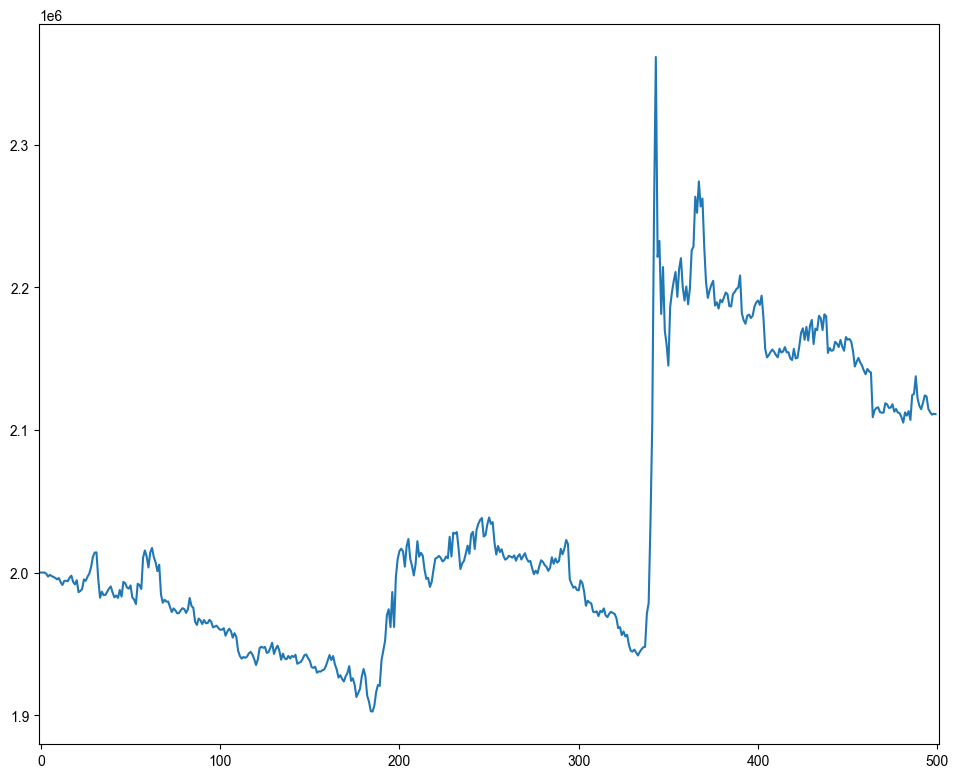

In [7]:
x = my_tm.get_funds_curve(sm.get_trading_calendar(q))
PRICELIST(x).plot()

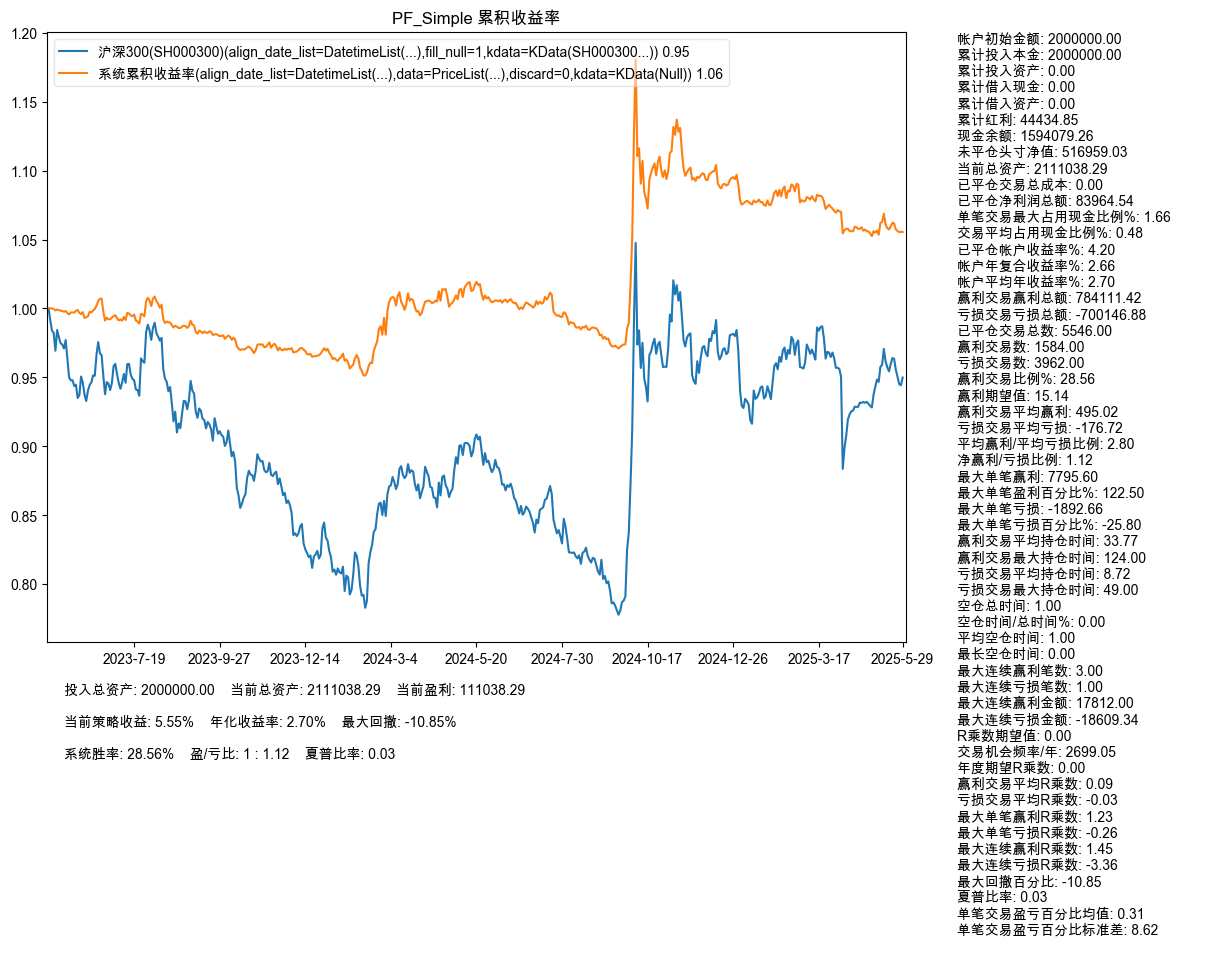

In [8]:
my_pf.performance()

In [9]:
my_tm

TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2001-01-01 00:00:00,
  init_cash: 2000000.00,
  firstDatetime: 2023-05-11 00:00:00,
  lastDatetime: 2025-05-29 00:00:00,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current total funds: 2111038.29,
  current cash: 1594079.26,
  current market_value: 516959.03,
  current short_market_value: 0.00,
  current base_cash: 2000000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
    SH688396 华润微 2025-05-29 00:00:00 1 147.00 6991.32 7041.30 49.98 0.71% 0.00%
    SH600276 恒瑞医药 2025-04-22 00:00:00 25 100.00 4884.00 5410.00 526.00 10.77% 0.03%
    SH600332 白云山 2025-05-07 00:00:00 17 200.00 5318.00 5382.00 64.00 1.20% 0.00%
    SH600000 浦发银行 2025-04-16 00:00:00 29 600.00 6270.00 7302.00 1032.00 16.46% 0.05%
    SH600009 上海机场 2025-05-15 00:00:00 11 200.00 6509.80 6506.00 -3.8